### Importar dataframe
Se importa el dataframe del archivo csv facilitado.

Al mirar el head para un primer vistazo a la base, se observa que hay una variable extra que no deberia figurar, "unnamed: 0", que hacía las veces de índice en el csv. Por tanto se elimina del dataframe de trabajo.

In [5]:
import pandas as pd

airline_df = pd.read_csv('../src/Data/airline.csv')

airline_df = airline_df.loc[:, airline_df.columns != 'Unnamed: 0']

In [6]:
airline_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Análisis de valores perdidos

Analizamos los valores perdidos mediante un mapa de calor usando seaborn y obteniendo directamente los valores de datos perdidos por columna para un mayor control del porcentaje.

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
103

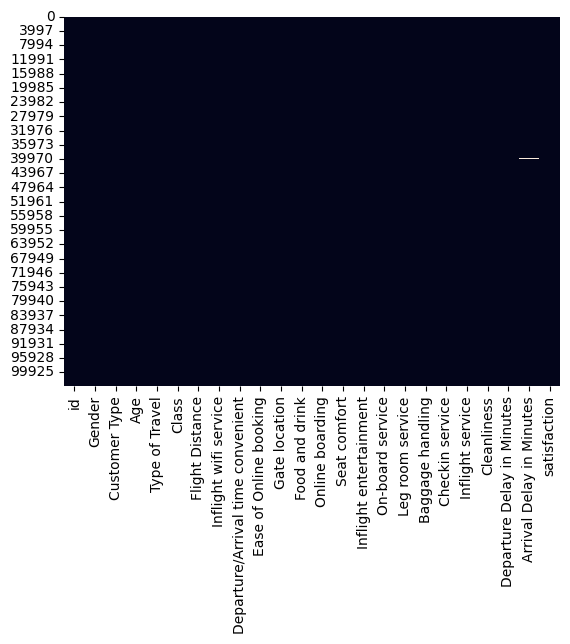

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(airline_df.isnull(), cbar=False)

print(airline_df.isna().sum()) # Datos perdidos por columna
print(len(airline_df.index))

Solo encontramos valores perdidos en la variable de retraso en minutos. El total de datos perdidos es de un 0.2% por lo que no debería plantaer un problema en los análisis que realicemos posteriormente. No obstante, por ser lo más exhaustivos posible, haremos imputación por ML.

In [8]:
from scipy.stats import norm
import numpy as np

data_no_nan = airline_df['Arrival Delay in Minutes'].dropna()
mu, std = norm.fit(data_no_nan)

imputed_values = np.random.normal(loc = mu, scale = std, size = airline_df['Arrival Delay in Minutes'].isna().sum())
airline_df_imp = airline_df.copy()
airline_df_imp.loc[airline_df['Arrival Delay in Minutes'].isna(), 'Arrival Delay in Minutes'] = imputed_values

airline_df_imp.to_csv('../src/Data/airline_imp.csv', index = False)

Podemos comprobar con otro heatmap que los valores se han imputado correctamente.

<Axes: >

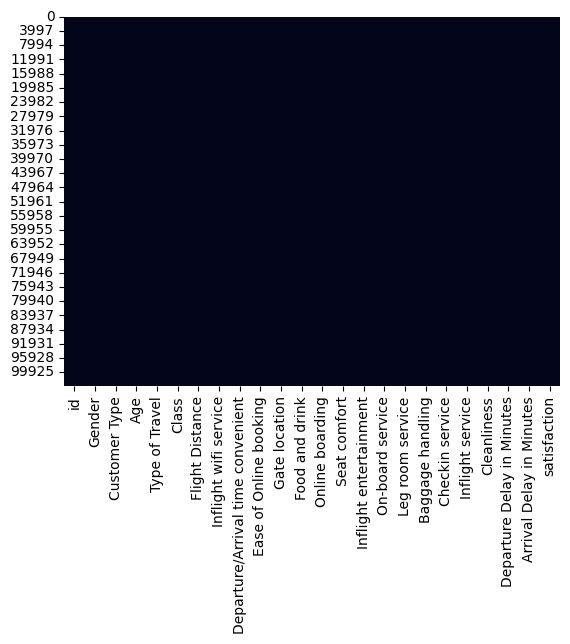

In [5]:
sns.heatmap(airline_df_imp.isnull(), cbar=False)

### Descriptivos
Extraemos los análisis descriptivos para la base de datos. Como puede entenderse por los resultados, y teniendo en cuenta como es la base de datos, la mayor parte de variables de opinion obedecen a una escala estilo Likert del 0 al 5 (aunque normalmente se utilizan escalas del 1 al 5 o del 1 al 7).

Teniendo en cuenta este tipo de variables, tendremos que extrear los descriptivos de las variables numéricas, y las frecuencias de las variables ordinales (podemos trabajar con la mediana pero en general es preferible trabajar con frecuencias.)

In [6]:
airline_df_imp.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Separamos las variables nominales y dicotómicas.

In [7]:
nom_columns = list(airline_df_imp.loc[:, 'Gender':'Customer Type']) + list(airline_df_imp.loc[:, 'Type of Travel':'Class']) + list(airline_df_imp.loc[:, 'Inflight wifi service':'Cleanliness']) + ['satisfaction']
airline_df_imp_nom = airline_df_imp[nom_columns]

In [8]:
airline_df_imp_nom.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


Graficaremos las frecuencias de las variables para tenerlas de forma más visual, aunque podrían presentarse los resultados mediante una tabla, en función del gusto del analista (aunque preferiblemente en tabla ya que ocupa menos espacio en un hipotético documento).

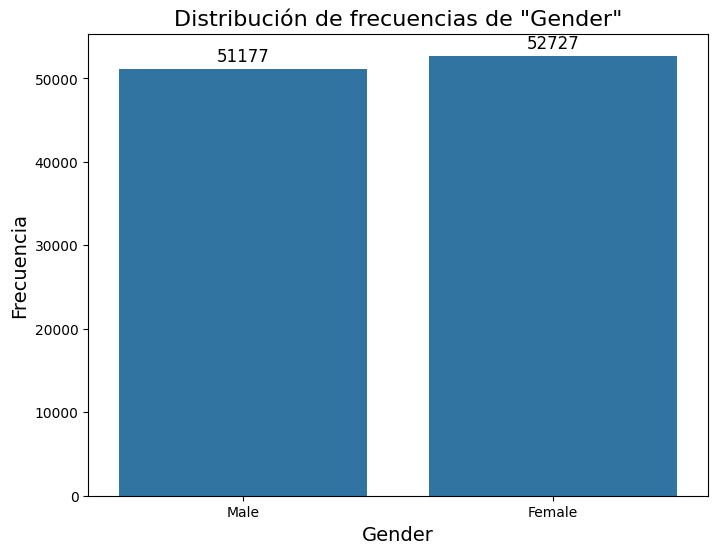

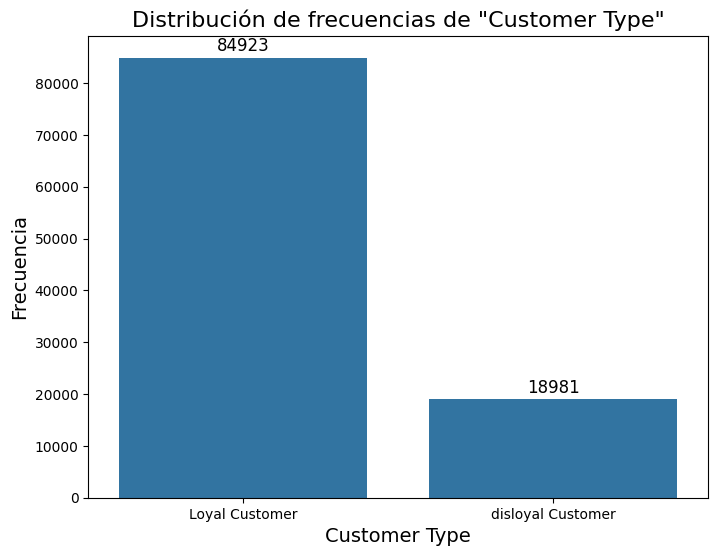

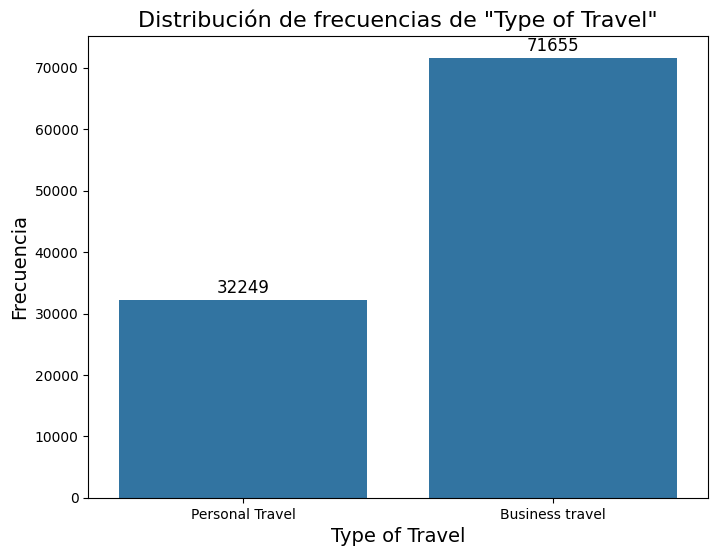

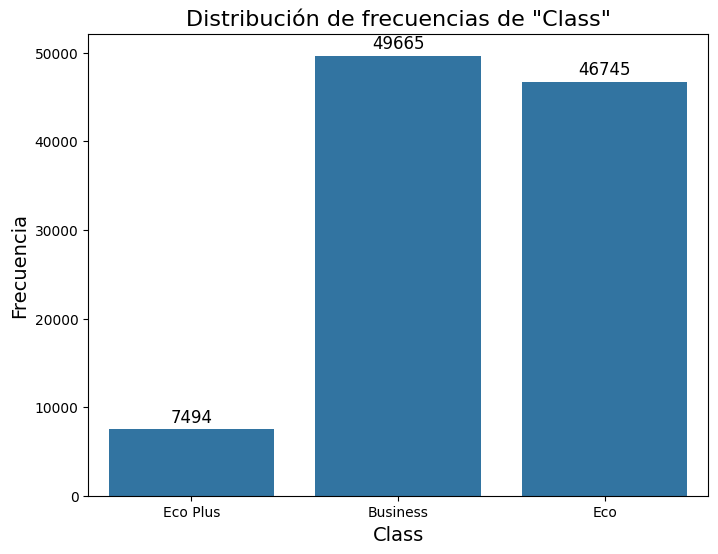

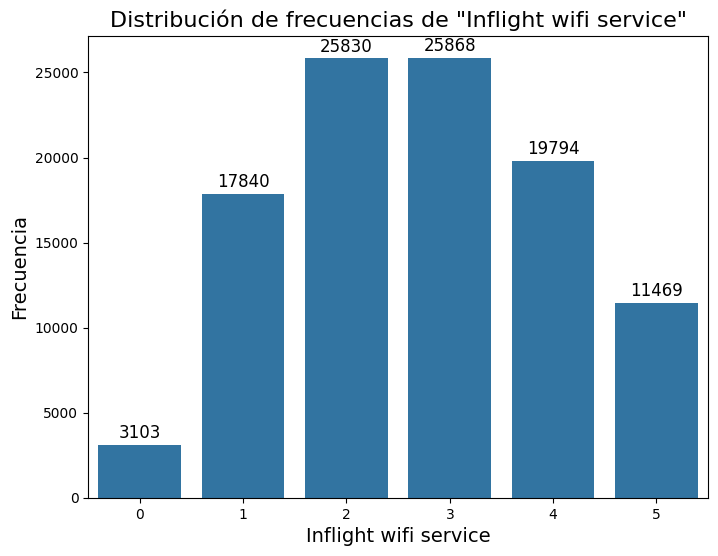

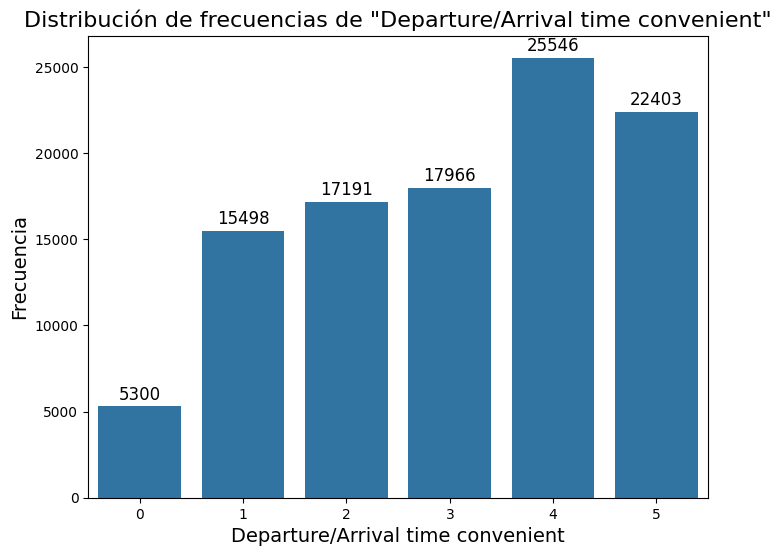

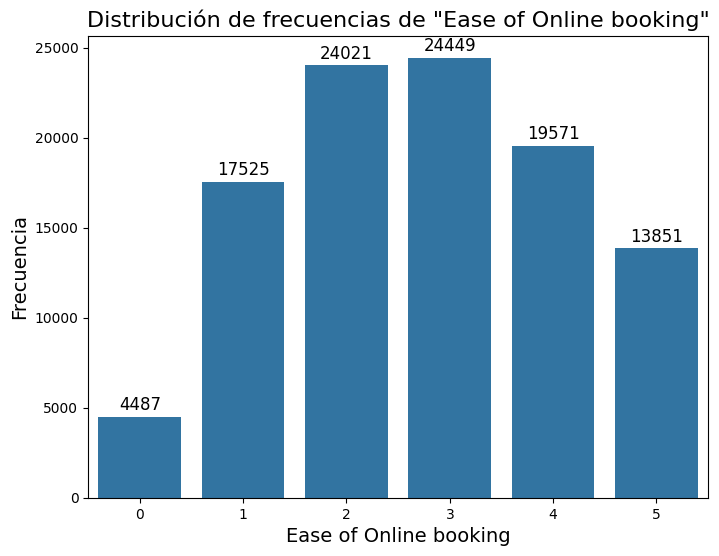

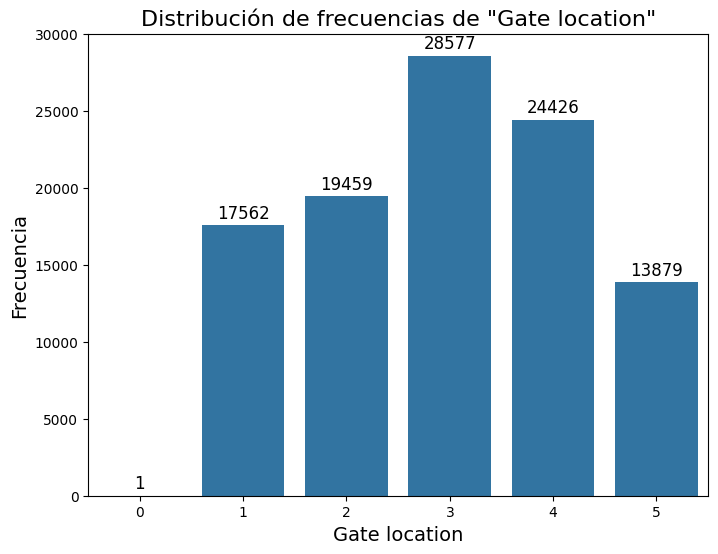

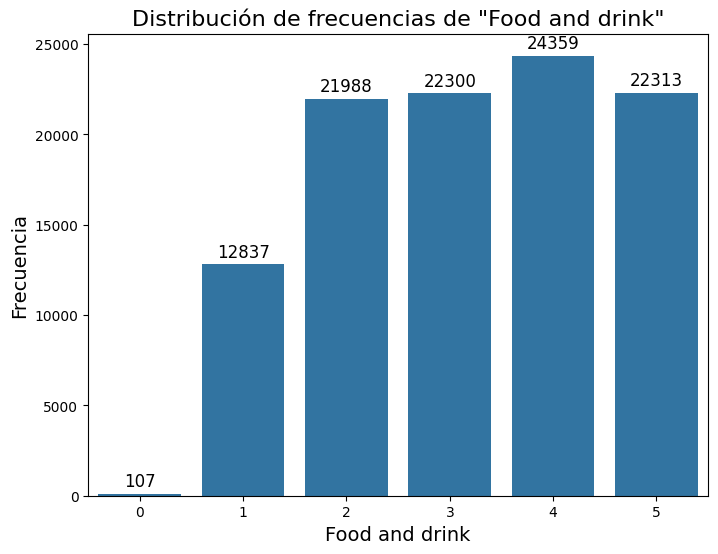

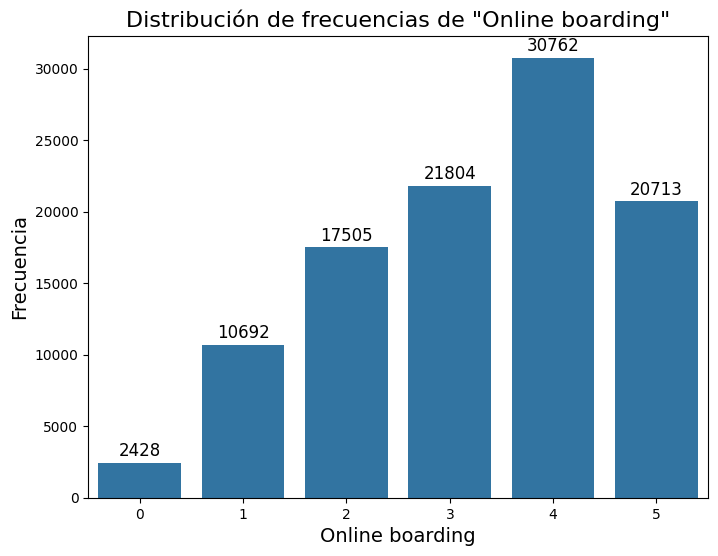

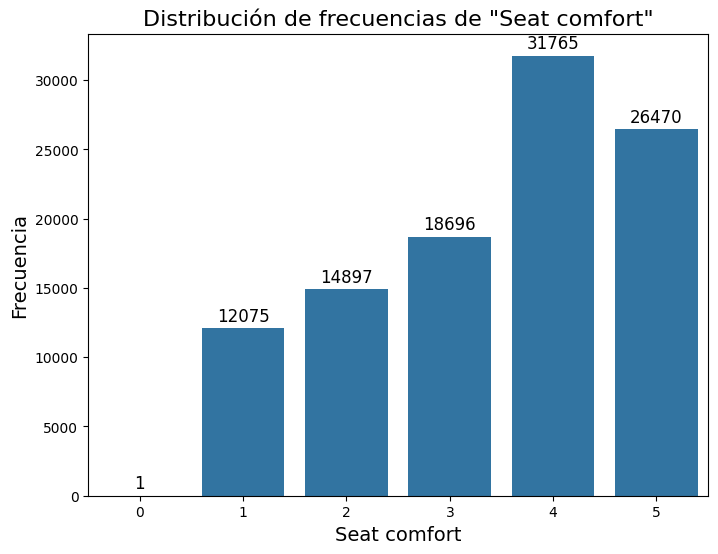

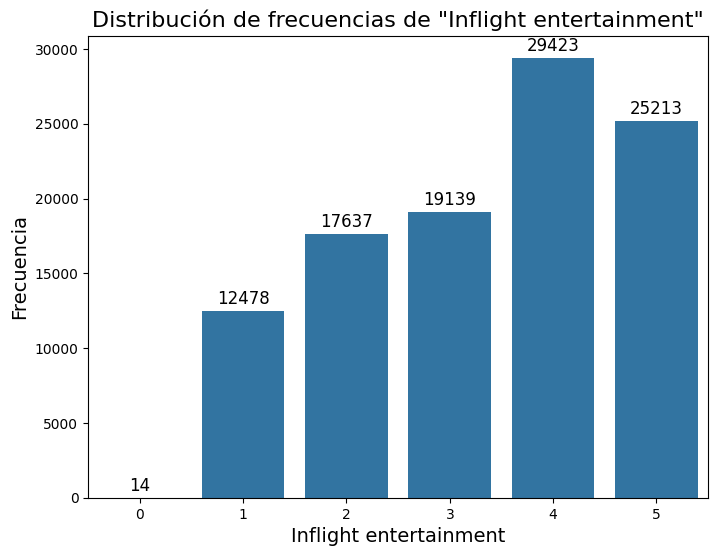

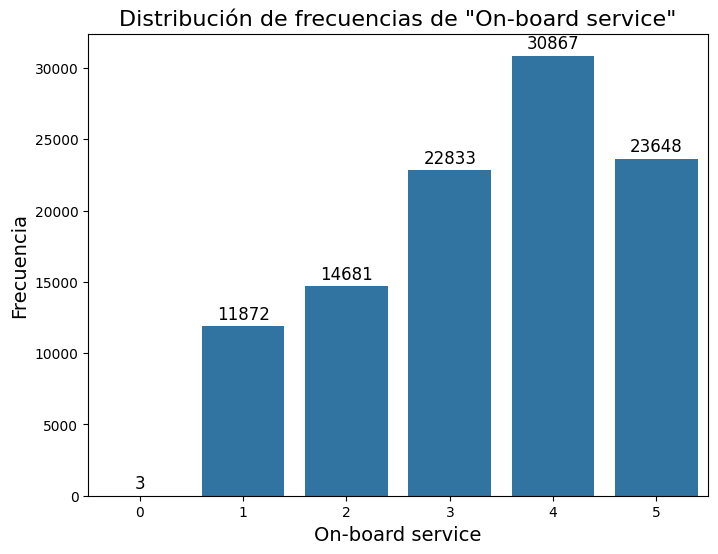

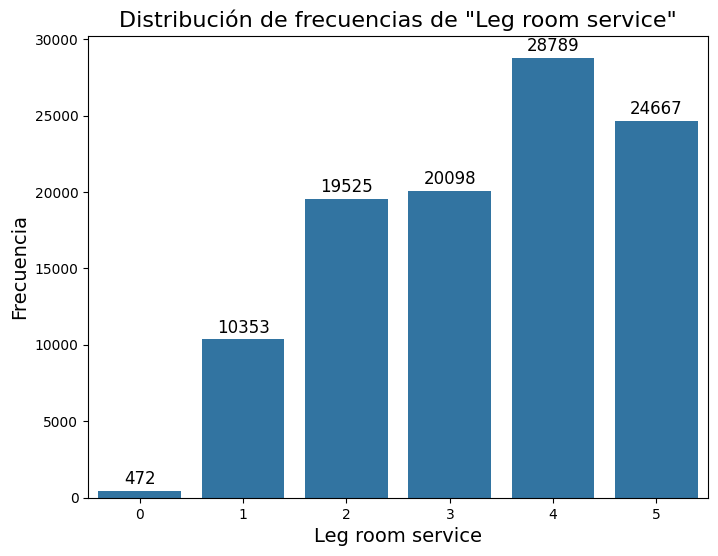

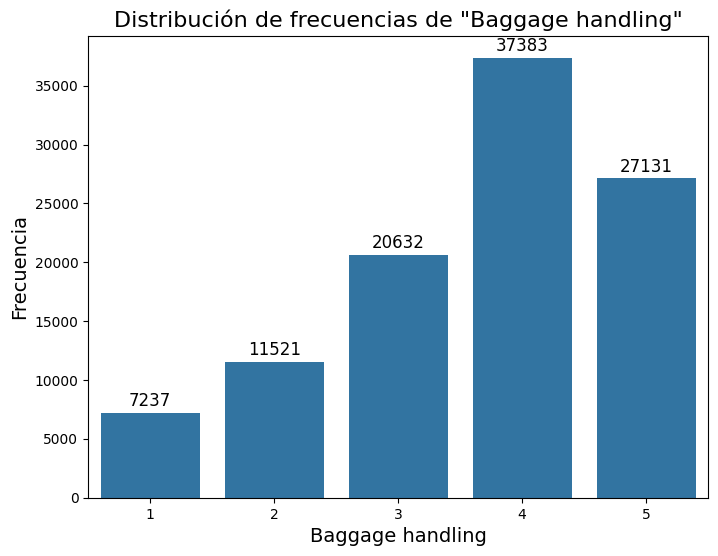

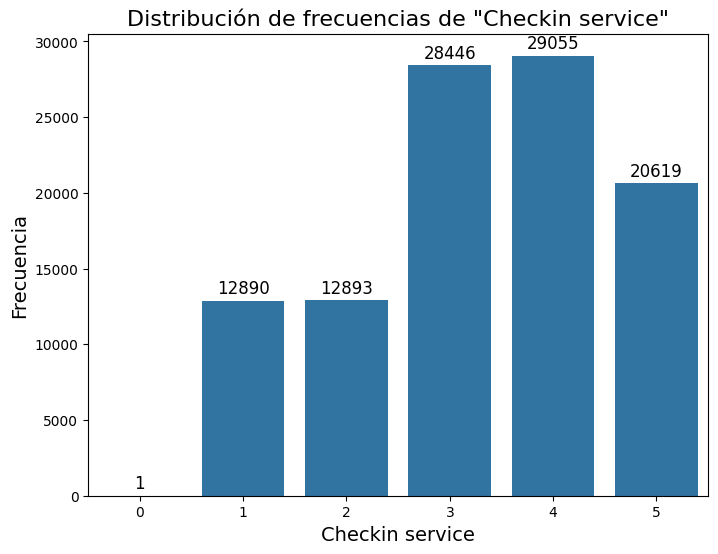

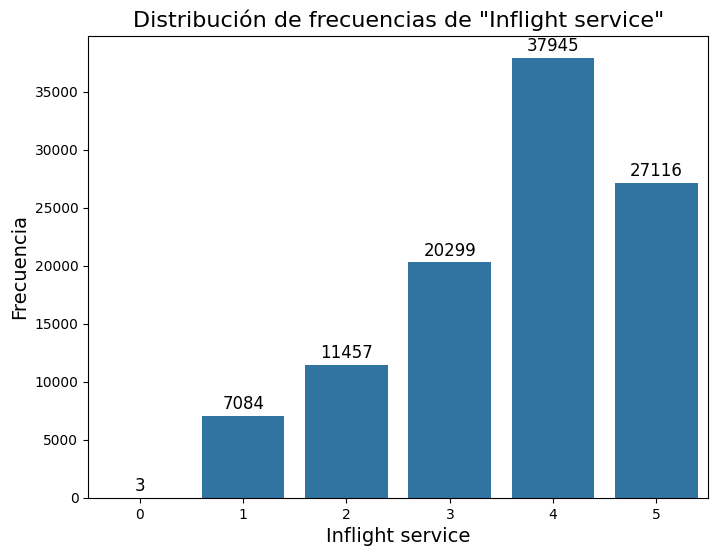

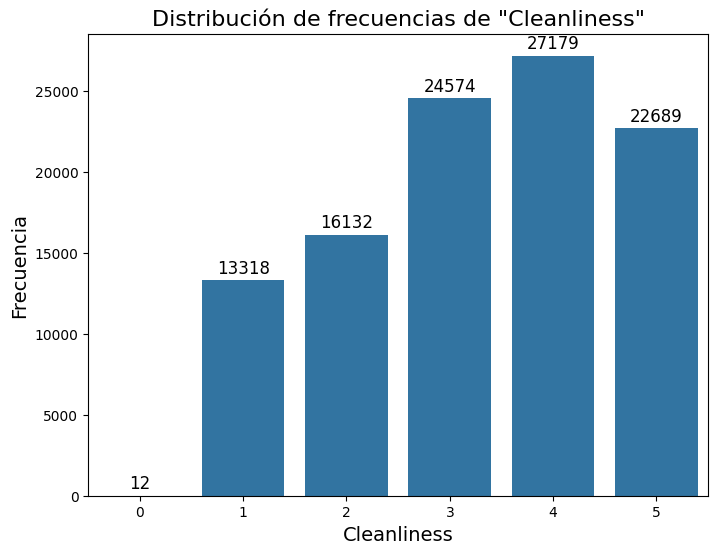

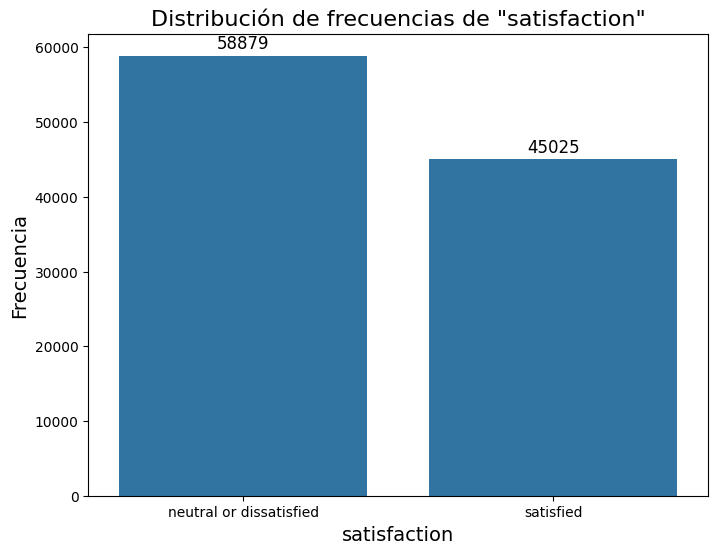

In [9]:
for columna in airline_df_imp_nom:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=columna, data=airline_df)
    
    # Añadir etiquetas de porcentaje sobre las barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Añadir títulos y etiquetas
    plt.title(f'Distribución de frecuencias de "{columna}"', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)

    # Mostrar cada gráfico
    plt.show()

En general vemos cierta tendencia a puntuaciones positivas sobre los diferentes aspectos del viaje (3 o superior), lo cual puede estar indicando un sesgo de aquiescencia, a excepción de la variable de wifi en el viaje.

Con respecto a los tipos de viajeros, vemos que hay un reparto igualado entre hombres y mujeres. Sin embargo, encontramos desequilibro en el resto de variables que definen al viajero. Hay más viajeros no leales que leales, hay muy poca muestra de viajes eco plus y más viajes de trabajo que viajes personales. Esto puede indicar que tengamos que balancear la muestra para el análisis posterior.


#### Variables cuantitativas

In [10]:
airline_df_imp_cuant = airline_df_imp.loc[:, ~airline_df_imp.columns.isin(airline_df_imp_nom.columns)]
airline_df_imp_cuant.head()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,13,460,25,18.0
1,5047,25,235,1,6.0
2,110028,26,1142,0,0.0
3,24026,25,562,11,9.0
4,119299,61,214,0,0.0


In [11]:
airline_df_imp_cuant.describe().iloc[:, 1:5] # Eliminamos del calculo la variable id ya que no tiene sentido

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.184897
std,15.114964,997.147281,38.230901,38.702786
min,7.000000,31.000000,0.000000,-111.513752
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Viendo los resultados descriptivos, lo que más llama la atención es que el retraso de llegada tiene un mínimo negativo, lo cual no parece tener sentido ya que se miden los minutos de retraso, que deberían ser siempre superiores a 0 o 0.

In [12]:
airline_df_imp_cuant[airline_df_imp_cuant['Arrival Delay in Minutes'] < 0]

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
1124,73442,53,1012,38,-37.209437
4041,66091,31,2490,6,-76.983891
4490,48504,30,737,22,-31.428921
4897,2408,55,2904,58,-66.924235
5295,19597,28,173,24,-8.663684
...,...,...,...,...,...
96093,51579,20,598,0,-14.152287
97243,27187,24,2681,92,-16.780813
97393,11845,31,3037,127,-28.934599
98636,7116,54,157,0,-55.098022


Si comprobamos los retrasos menores a 0 podemos llegar a dos conclusiones, los valores negativos hacen referencia a ocasiones en las que el avión llegó antes de lo previsto a su destino, o podemos considerar que es un error en el registro. Como la variable define los valores de retraso, para dar consistencia, y teniendo en cuenta que el número de casos afectados es un porcentaje muy bajo, vamos a modificarlos a valor 0 para registrar que no hubo retraso.

In [9]:
airline_df_imp_cuant.loc[airline_df_imp_cuant['Arrival Delay in Minutes'] < 0, 'Arrival Delay in Minutes'] = 0

NameError: name 'airline_df_imp_cuant' is not defined

In [14]:
airline_df_imp_cuant.describe().iloc[:, 1:5]

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.210973
std,15.114964,997.147281,38.230901,38.678147
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Podemos obtener los histogramas de las variables cuantitativas y sus box-plot para analizar su forma y posibles valores atípicos.

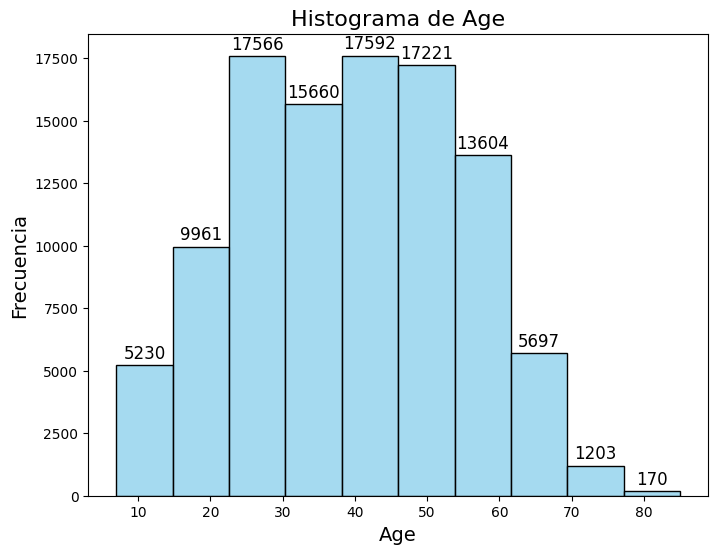

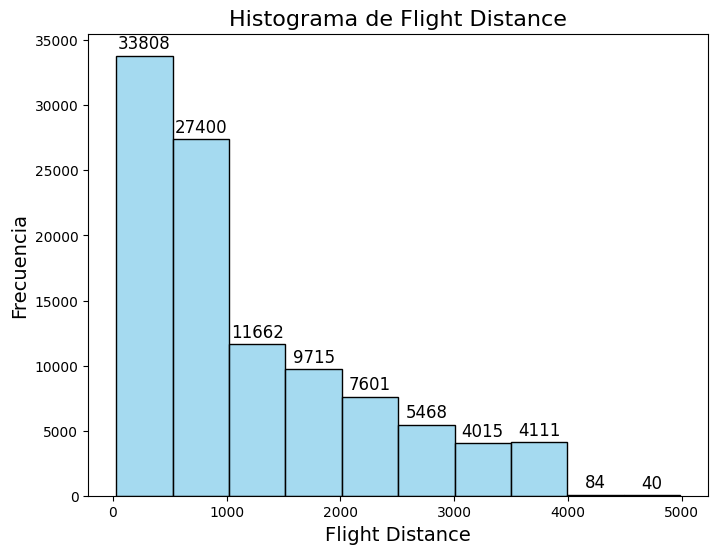

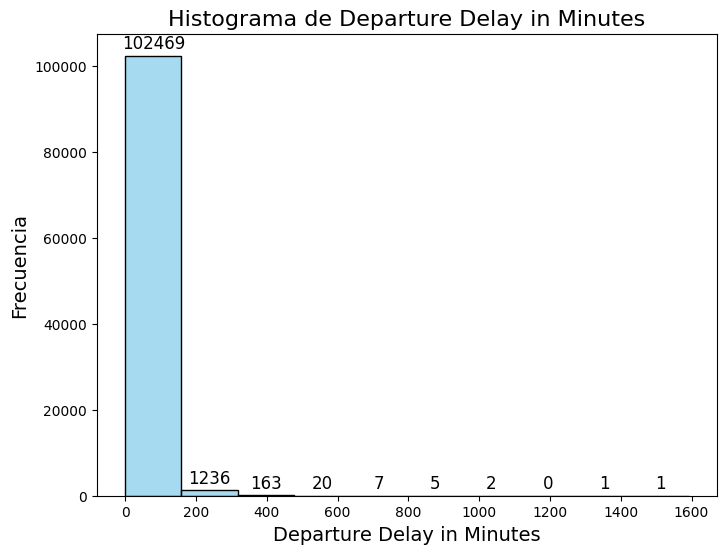

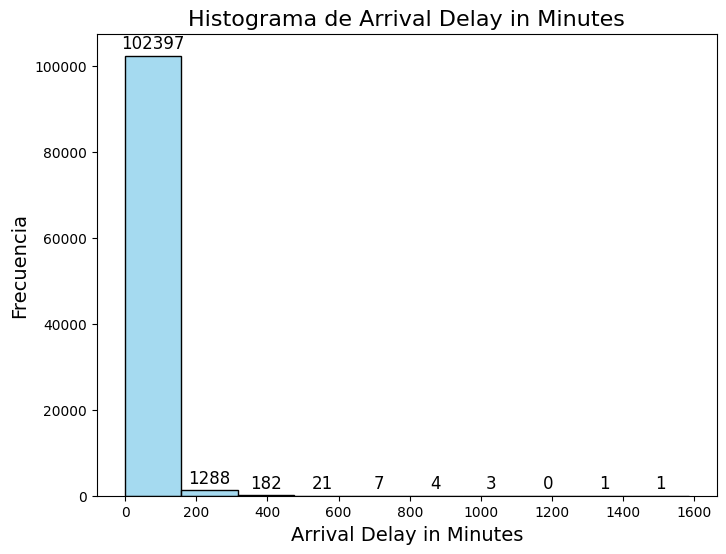

In [15]:
for columna in airline_df_imp_cuant.iloc[:, 1:5]:
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(airline_df_imp_cuant[columna], kde=False, bins=10, color='skyblue')

    # Añadir etiquetas de frecuencia sobre las barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Añadir títulos y etiquetas
    plt.title(f'Histograma de {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)

    # Mostrar cada histograma
    plt.show()

Con respecto a los histogramas vemos que la distribución de edad tiene algún parecido a la distribución normal, pero con menos valores a la derecha de la distribución (población de tercera edad). El resto de histogramas presentan bastante asimetría derecha, indicando para los retrasos que en general los desplazamientos suelen ser puntuales, o al menos no tienen mucho retraso (si podemos considerar 200 minutos poco retraso).
En cuanto a la distancia de vuelo, en general vemos que los desplazamientos tienden a ser más cortos, pero no hay tanta asimetría como en las distribuciones de retrasos.

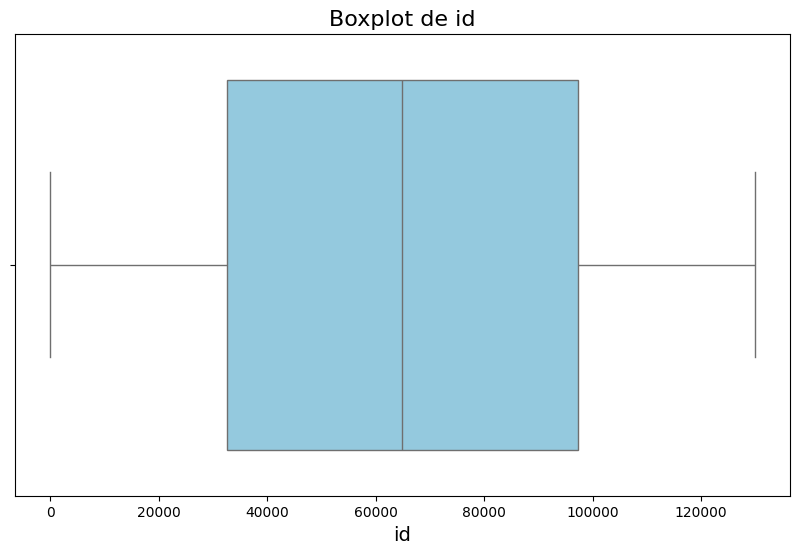

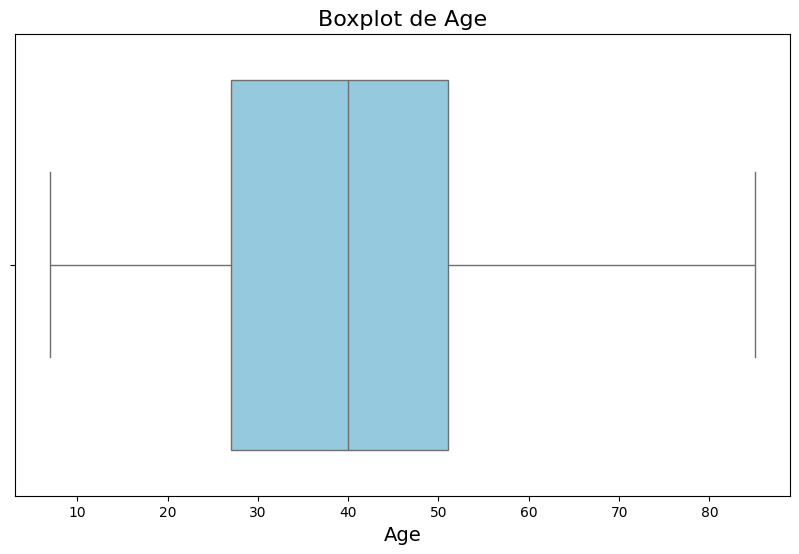

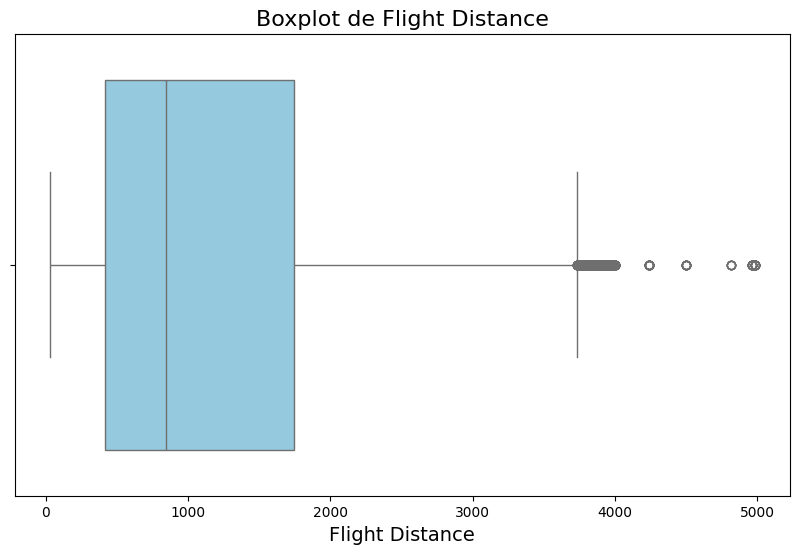

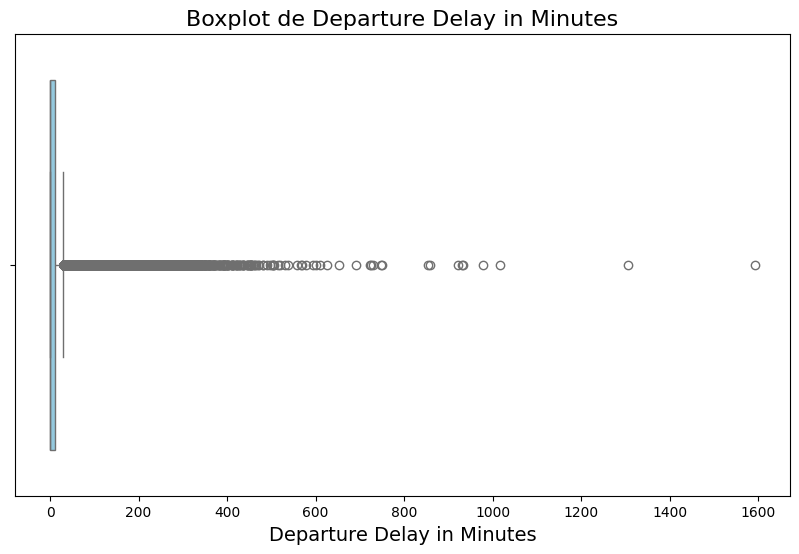

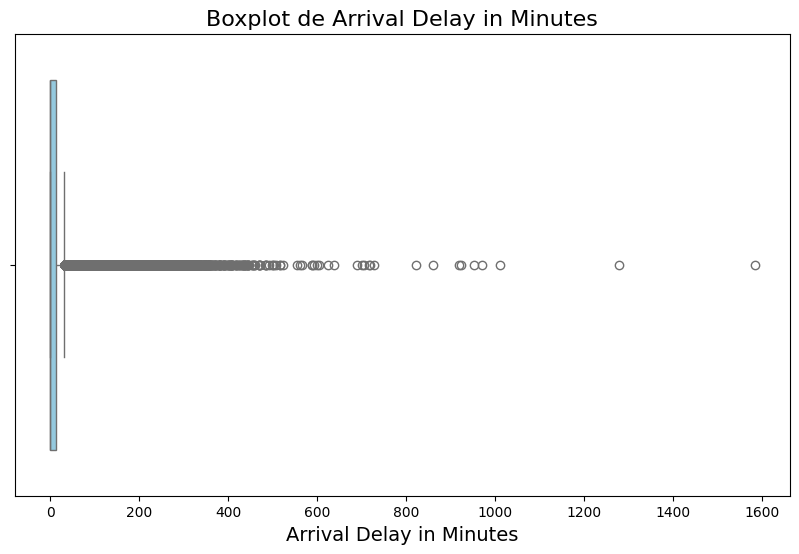

In [16]:
for columna in airline_df_imp_cuant:
    plt.figure(figsize=(10, 6))
    
    # Crear el boxplot
    ax = sns.boxplot(x=airline_df_imp_cuant[columna], color='skyblue')
    
    # Añadir títulos y etiquetas
    plt.title(f'Boxplot de {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    
    # Mostrar el boxplot
    plt.show()

Si nos fijamos en los boxplot, debido a la alta asimetría que hemos visto en los histogramas previos, se pueden ver un gran número de valores atípicos en los gráficos de retraso, y algunos en el gráfico de distancia de vuelo. No obstante, en estos casos no podemos considerar que estos valores no sean válidos, ya que es factible que haya habido puntualmente algún retraso muy exagerado (como todo conocemos, ya lo hayamos visto en la tv o lo hayamos sufrido).